In [ ]:
# !!!!!!    For more customization reinvent your own version of the draw_dot() method and topo method (topological sort)

In [ ]:
import math


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5
  

In [ ]:
f(1.40)

5.279999999999999

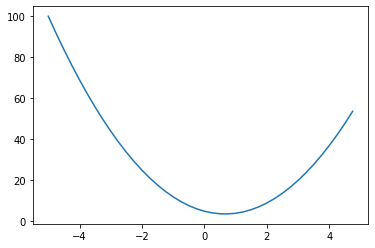

In [ ]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [ ]:
class Variable:
  def __init__(self, value, _childs=(), _operation = '',label = '' ):
    self.grad = 0.0
    self._backward = lambda: None
    self.label = label
    self.value = value
    self.prev = set(_childs)
    self.operation = _operation

  
  def __repr__(self):
    return f"Value(data = {self.value})"

  def __add__(self,other):
    if (type(other) != Variable): other = Variable(other)
    if(type(self) != Variable): self = Variable(self)
    output = Variable(self.value + other.value)
    t = (self,other)
    output.prev = set (t)
    output.operation = '+'

    def _backward():
      self.grad += 1.0 * output.grad
      other.grad += 1.0 * output.grad
    output._backward = _backward

    return output
  
  def __mul__(self,other):
    if (type(other) != Variable): other = Variable(other)
    output = Variable(self.value * other.value )
    t = (self,other)
    output.prev = set (t)
    output.operation = '*'
    
    def _backward():
      self.grad += other.value * output.grad
      other.grad += self.value * output.grad
    output._backward = _backward

    return output

  def __sub__(self, other): # self - other
    if (type(other) != Variable): other = Variable(other)
    output = Variable(self.value - other.value)
    t = (self,other)
    output.prev = set (t)
    output.operation = '-'

    def _backward():
      self.grad += 1.0 * output.grad
      other.grad += -1.0 * output.grad
    output._backward = _backward
    
    return output

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Variable(self.value**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.value ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.value
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Variable(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out
  
  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v.prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

  

In [ ]:
#import pdb

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v.prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    print(n.label)
  for n in nodes:
    #pdb.set_trace()
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | value %.4f | grad %.4f }" % (n.label, n.value, n.grad), shape='record')
    if n.operation:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n.operation, label = n.operation)
      # and connect this node to it
      dot.edge(uid + n.operation, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2.operation)

  return dot

In [ ]:

a = Variable(2.0, label='a')
b = Variable(-3.0, label='b')
c = Variable(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Variable(-2.0, label='f')
L = d * f; L.label = 'L'
L


Value(data = -8.0)

c
a
e
d
L
f
b


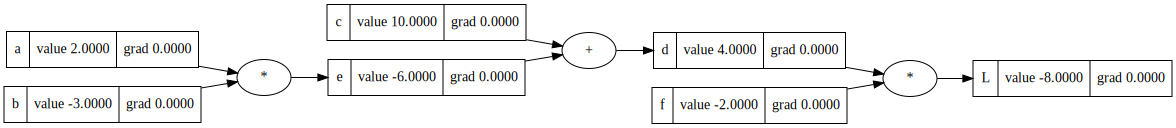

In [ ]:
draw_dot(L)


In [ ]:
L.grad = 1
a.grad = 6
b.grad = -4
c.grad = -2
d.grad = -2
e.grad = -2
f.grad = 4

In [ ]:
a.value = a.value + 0.01 * a.grad
b.value += 0.01 * b.grad
c.value += 0.01 * c.grad
f.value += 0.01 * f.grad


e = a * b
d = e + c
L = d * f

print(L.value)

-7.286496


c
a



f
b


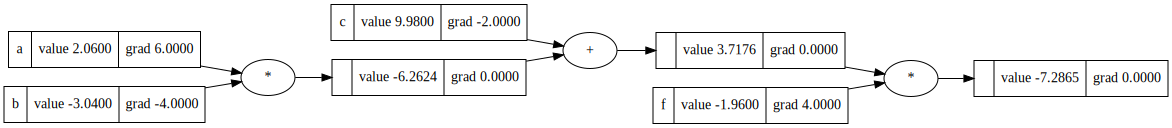

In [ ]:
draw_dot(L)

In [ ]:

def lol():
  
  h = 0.001
  
  a = Variable(2.0 , label='a')
  b = Variable(-3.0 , label='b')
  c = Variable(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Variable(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.value
  
  a = Variable(2.0  , label='a')
  b = Variable(-3.0 , label='b')
  c = Variable(10.0 , label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Variable(-2.0, label='f')
  f.value += h
  L = d * f; L.label = 'L'
  L2 = L.value
  
  print((L2 - L1)/h)
  
lol()


3.9999999999995595


In [ ]:
# inputs x1,x2
x1 = Variable(2.0, label='x1')
x2 = Variable(0.0, label='x2')
# weights w1,w2
w1 = Variable(-3.0, label='w1')
w2 = Variable(1.0, label='w2')
# bias of the neuron
b = Variable(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


In [ ]:
o.backward()

x1
x1*w1 + x2*w2
b
w1
x2
o
x1*w1
w2
x2*w2
n


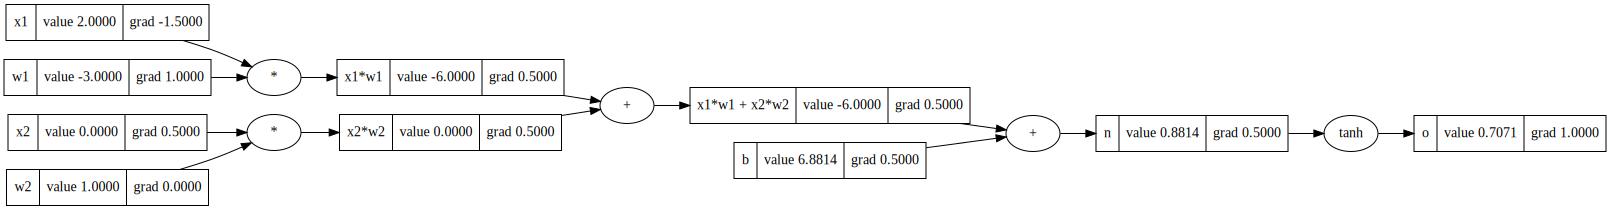

In [ ]:
draw_dot(o)

b
a


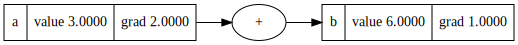

In [ ]:
a = Variable(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

In [ ]:
import random

class Neuron:
  
  def __init__(self, connections):
    self.w = [Variable(random.uniform(-1,1)) for iter in range(connections)]
    self.b = Variable(random.uniform(-1,1))
  
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    squished_act = act.tanh()
    return squished_act
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  
  def __init__(self, connections, num_neurons):
    self.neurons = [Neuron(connections) for iter in range(num_neurons)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]   ##

class MLP:
  
  def __init__(self, connections, mlp_skeleton):
    sz = [connections] + mlp_skeleton
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(mlp_skeleton))]
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [ ]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data = 0.21320774197224582)

In [ ]:
draw_dot(n(x))

In [ ]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ydesired = [1.0, -1.0, -1.0, 1.0] # desired targets

ypred=[]

for x in xs:
  youtput = n(x)
  ypred.append(youtput) 
  print(youtput)


Value(data = 0.21320774197224582)
Value(data = 0.32674967088668894)
Value(data = 0.5982767232708908)
Value(data = 0.14241077525832843)
[Value(data = 0.21320774197224582), Value(data = 0.32674967088668894), Value(data = 0.5982767232708908), Value(data = 0.14241077525832843)]


In [ ]:
print(ypred)

[Value(data = 0.21320774197224582), Value(data = 0.32674967088668894), Value(data = 0.5982767232708908), Value(data = 0.14241077525832843)]


In [ ]:
loss = sum ((yout - ygt)**2 for ygt,yout in zip(ydesired, ypred))
print(loss)

TypeError: ignored

In [ ]:
L = [(yout - ygt)**2 for ygt,yout in zip(ydesired, ypred)]
L

[Value(data = 0.6190420572924121),
 Value(data = 1.7602646891979372),
 Value(data = 2.5544884841495357),
 Value(data = 0.7354592783930212)]

In [ ]:
loss = Variable(0)
for i in L:
  loss = loss + i

print(loss)


Value(data = 5.669254509032906)


In [ ]:
## All the below steps perform a gradient descent step in the direction of minimal loss ##

In [ ]:
# Nudging the weights
for p in n.parameters():
  p.value += -0.1 * p.grad

In [ ]:
#forward pass
ypred = [n(x) for x in xs]


In [ ]:
 # backward pass
for p in n.parameters():
    p.grad = 0.0
loss.backward()

In [ ]:
L = [(yout - ygt)**2 for ygt,yout in zip(ydesired, ypred)]
loss = Variable(0)
for i in L:
  loss = loss + i

print(loss)

Value(data = 0.029424708072214485)


In [ ]:
# These are the weights corresponding to significantly good loss of only 0.029424     By the way do some more gradient descents to get less loss if you want
n.parameters()

In [ ]:
class Parent:
  def 